<a href="https://colab.research.google.com/github/JuJu2181/LearnML/blob/master/ML_Day1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML FOR BEGINNERS
## Regression Day1: Tools

In [ ]:
#importing all necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, model_selection

In [ ]:
#Loading the diabetes dataset
#return_X_y = True signals that x will be data matrix(feature) and y will the regression target
X,y = datasets.load_diabetes(return_X_y=True)
print(X.shape)
print(X[0])

(442, 10)
[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990842 -0.01764613]


> newaxis function in numpy can help to change or expand the dimension of a numpy array

[Newaxis Description](https://www.educba.com/numpy-newaxis/)

In [ ]:
#plotting a portion of data using numpy 
X = X[:,np.newaxis,2]
print(X.shape)
print(X[0])

(442, 1)
[0.06169621]


In [ ]:
# splitting the available data to train and test data 
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.33)

In [ ]:
#Loading the linear regression modela and then training it withe the training data of X and y 
model = linear_model.LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#prediction using test data 
y_pred = model.predict(X_test)

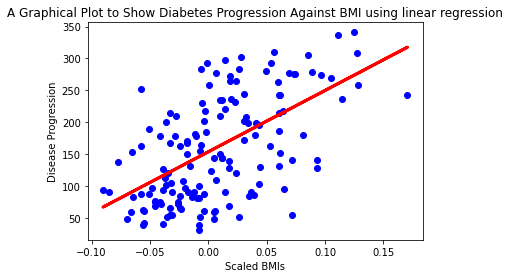

In [ ]:
#Using MatplotLib to create the scatterplot of all X and y test data 
#and then using the prediction to draw a line in the most appropriate place 
plt.scatter(X_test,y_test,color='blue')
#using the predicted value of y from the model
plt.plot(X_test,y_pred,color='red',linewidth=3)
plt.xlabel('Scaled BMIs')
plt.ylabel('Disease Progression')
plt.title('A Graphical Plot to Show Diabetes Progression Against BMI using linear regression')
plt.show()

## Day 2 : Working with DATA

In [20]:
import pandas as pd
pumpkins = pd.read_csv('https://raw.githubusercontent.com/JuJu2181/ML-For-Beginners/main/2-Regression/data/US-pumpkins.csv')
pumpkins.head()
# pumpkins.tail()


,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,Mostly High,Origin,Origin District,Item Size,Color,Environment,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,280.0,MARYLAND,NaN,lge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,280.0,MARYLAND,NaN,lge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,160.0,DELAWARE,NaN,med,ORANGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,160.0,VIRGINIA,NaN,med,ORANGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,100.0,MARYLAND,NaN,lge,ORANGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [21]:
#Extracting months from the date
pumpkins['Month'] = pd.DatetimeIndex(pumpkins['Date']).month
pumpkins['Month']

0        4
1        5
2        9
3        9
4       11
        ..
1752     9
1753     9
1754     9
1755     9
1756     9
Name: Month, Length: 1757, dtype: int64

In [22]:
#to check if there is missing data in the current dataframe
pumpkins.isnull().sum()

City Name             0
Type               1712
Package               0
Variety               5
Sub Variety        1461
Grade              1757
Date                  0
Low Price             0
High Price            0
Mostly Low          103
Mostly High         103
Origin                3
Origin District    1626
Item Size           279
Color               616
Environment        1757
Unit of Sale       1595
Quality            1757
Condition          1757
Appearance         1757
Storage            1757
Crop               1757
Repack                0
Trans Mode         1757
Unnamed: 24        1757
Unnamed: 25        1654
Month                 0
dtype: int64

In [23]:
#dropping all the unnecessary columns from the dataframe
#axis= 1 is for columns
new_columns = ['Package','Month','Low Price','High Price','Date']
pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns],axis=1)

In [24]:
pumpkins.head()

,Package,Date,Low Price,High Price,Month
0,24 inch bins,4/29/17,270.0,280.0,4
1,24 inch bins,5/6/17,270.0,280.0,5
2,24 inch bins,9/24/16,160.0,160.0,9
3,24 inch bins,9/24/16,160.0,160.0,9
4,24 inch bins,11/5/16,90.0,100.0,11


In [25]:
#calculating the average price of pumpkin of a given month
price = (pumpkins['Low Price'] + pumpkins['High Price'])/2
month = pumpkins['Month']
print(month)

0        4
1        5
2        9
3        9
4       11
        ..
1752     9
1753     9
1754     9
1755     9
1756     9
Name: Month, Length: 1757, dtype: int64


In [26]:
#creating a new data frame 
new_pumpkins = pd.DataFrame({'Month': month,'Package': pumpkins['Package'],'Low Price': pumpkins['Low Price'],'High Price': pumpkins['High Price'], 'Price': price})
new_pumpkins.head()

,Month,Package,Low Price,High Price,Price
0,4,24 inch bins,270.0,280.0,275.0
1,5,24 inch bins,270.0,280.0,275.0
2,9,24 inch bins,160.0,160.0,160.0
3,9,24 inch bins,160.0,160.0,160.0
4,11,24 inch bins,90.0,100.0,95.0


In [27]:
#Filtering only the pumpkins with 'bushel' in their package column
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel',case=True,regex=True)]
new_pumpkins = new_pumpkins[new_pumpkins['Package'].str.contains('bushel',case=True,regex=True)]
print(pumpkins)

                   Package     Date  Low Price  High Price  Month
70    1 1/9 bushel cartons  9/24/16      15.00        15.0      9
71    1 1/9 bushel cartons  9/24/16      18.00        18.0      9
72    1 1/9 bushel cartons  10/1/16      18.00        18.0     10
73    1 1/9 bushel cartons  10/1/16      17.00        17.0     10
74    1 1/9 bushel cartons  10/8/16      15.00        15.0     10
...                    ...      ...        ...         ...    ...
1738    1/2 bushel cartons  9/30/16      15.00        15.0      9
1739    1/2 bushel cartons  9/30/16      13.75        15.0      9
1740    1/2 bushel cartons  9/30/16      10.75        15.0      9
1741    1/2 bushel cartons  9/30/16      12.00        12.0      9
1742    1/2 bushel cartons  9/30/16      12.00        12.0      9

[415 rows x 5 columns]


In [28]:
#As the bushel amount varies per row so we need to normalize the pricing to show pricing per bushel
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'),'Price'] = price/(1 + 1/9)
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'),'Price'] = price/(1/2)
new_pumpkins.head()

,Month,Package,Low Price,High Price,Price
70,9,1 1/9 bushel cartons,15.0,15.0,13.5
71,9,1 1/9 bushel cartons,18.0,18.0,16.2
72,10,1 1/9 bushel cartons,18.0,18.0,16.2
73,10,1 1/9 bushel cartons,17.0,17.0,15.3
74,10,1 1/9 bushel cartons,15.0,15.0,13.5


In [31]:
#Data visualization
import matplotlib.pyplot as plt

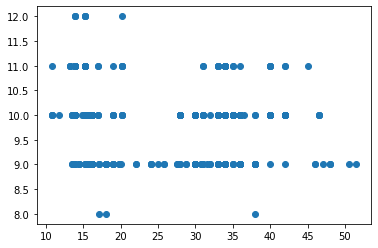

In [32]:
price = new_pumpkins.Price
month = new_pumpkins.Month
plt.scatter(price,month)
plt.show()

Text(0, 0.5, 'Pumpkin Price')

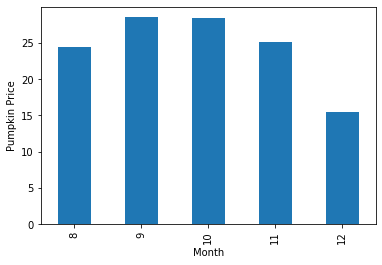

In [33]:
new_pumpkins.groupby(['Month'])['Price'].mean().plot(kind='bar')
plt.ylabel("Pumpkin Price")

In [34]:
#visualization using seaborn
import seaborn as sns

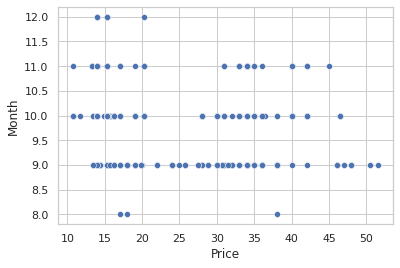

In [38]:
sns.set_theme(style="whitegrid")
sns.scatterplot(x="Price",y="Month",data=new_pumpkins)

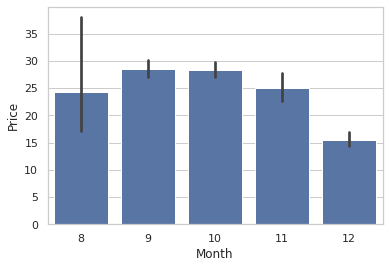

In [40]:
sns.barplot(data=new_pumpkins,x="Month",y="Price",color="b")